## Logistic Regression Sklearn 

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from the specified file path
file_path = r'.\Titanic-Dataset.csv'
titanic = pd.read_csv(file_path)

# Drop rows with missing target values
titanic = titanic.dropna(subset=['Survived'])

# Select relevant features and drop rows with missing values
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = titanic[features + ['Survived']].dropna()

# Convert categorical features to numerical values
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)

# Separate features (X) and target (y)
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Print the logistic regression equation
print(f'Logistic Regression Equation: logit(p) = {" + ".join([f"{coef:.4f}*x{i}" for i, coef in enumerate(coefficients)])} + {intercept:.4f}')

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extracting values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate accuracy manually
accuracy_manual = (tp + tn) / (tp + tn + fp + fn)
print(f'Calculated Accuracy: {accuracy_manual * 100:.2f}%')



Logistic Regression Equation: logit(p) = -1.0949*x0 + 1.3053*x1 + -0.5308*x2 + -0.3202*x3 + -0.0137*x4 + -0.0382*x5 + -0.1123*x6 + -0.1075*x7 + -0.6042
Accuracy: 79.72%
Calculated Accuracy: 79.72%


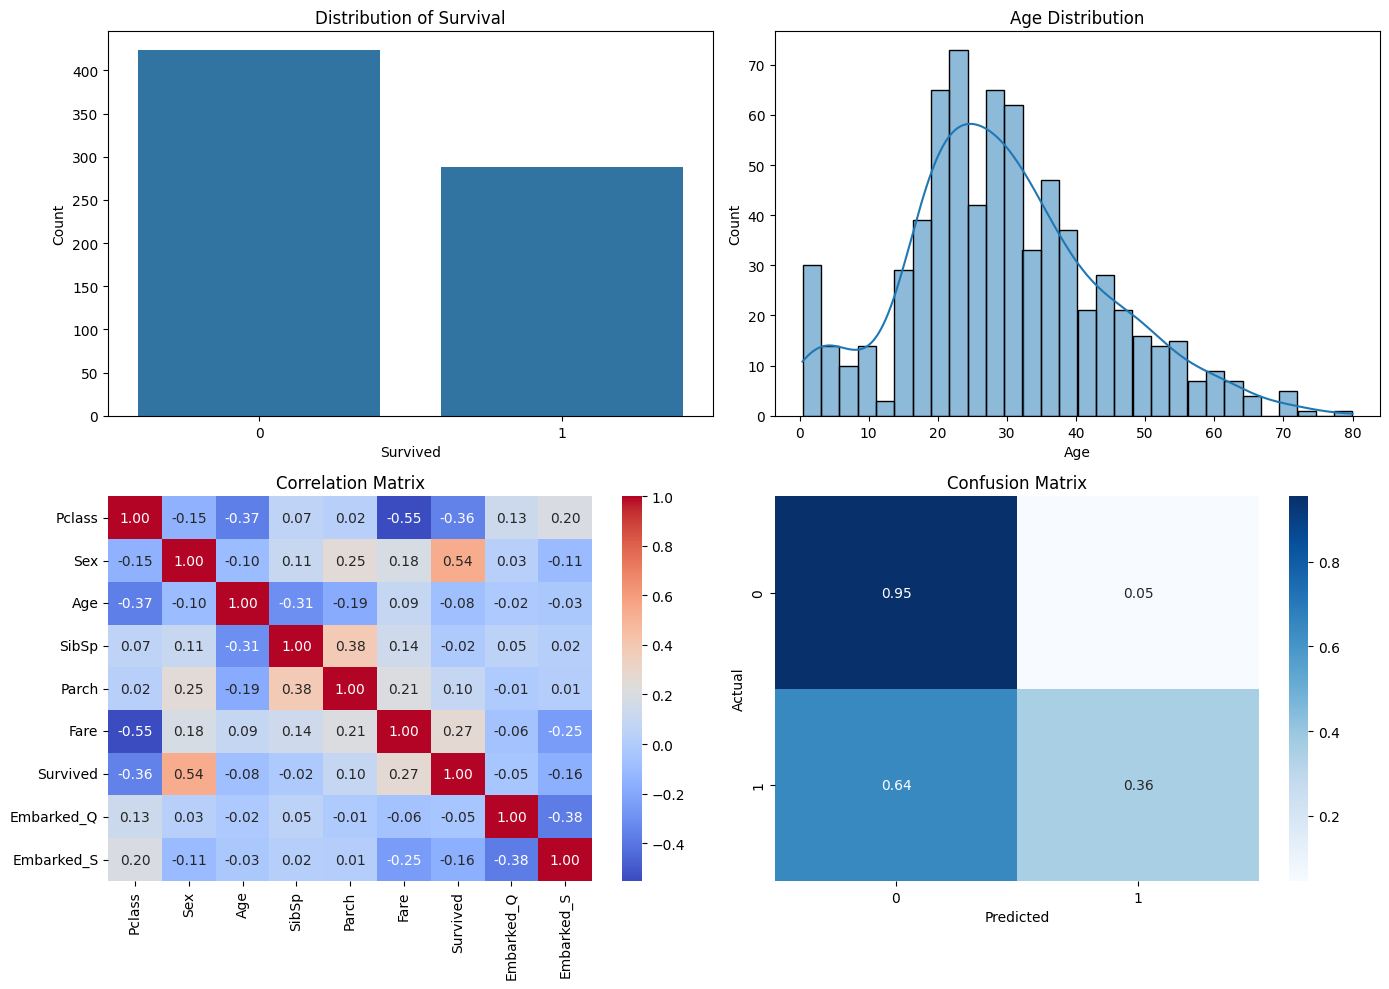

In [16]:
# Plotting Confusion Matrix

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution of the classes
sns.countplot(data=titanic, x='Survived', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Survival')
axes[0, 0].set_xlabel('Survived')
axes[0, 0].set_ylabel('Count')

# 2. Distribution of Age
sns.histplot(data=titanic, x='Age', bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')

# 3. Correlation Matrix
corr_matrix = titanic.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Correlation Matrix')

# 4. Confusion Matrix
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Confusion Matrix')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

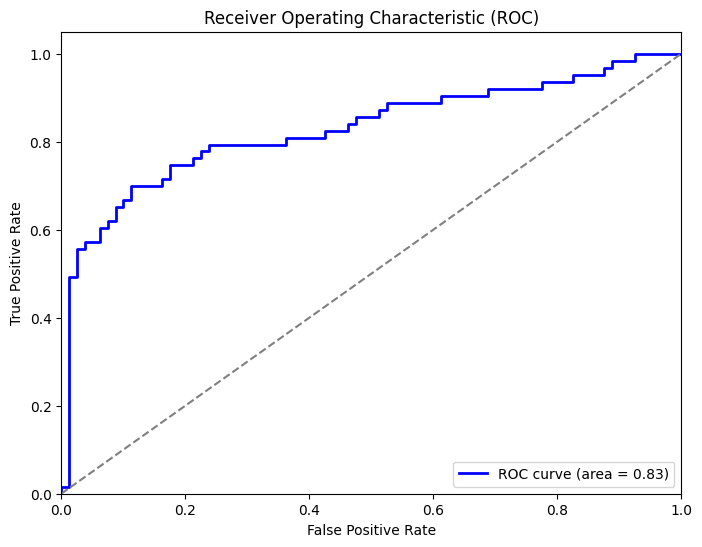

In [6]:


# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Iteration    0: Cost 0.6728
Iteration 2000: Cost 0.5873
Iteration 4000: Cost 0.5651
Iteration 6000: Cost 0.5478
Iteration 8000: Cost 0.5337
Iteration 10000: Cost 0.5221
Iteration 12000: Cost 0.5125
Iteration 14000: Cost 0.5045
Iteration 16000: Cost 0.4978
Iteration 18000: Cost 0.4922
Accuracy: 83.22%
Calculated Accuracy: 83.22%


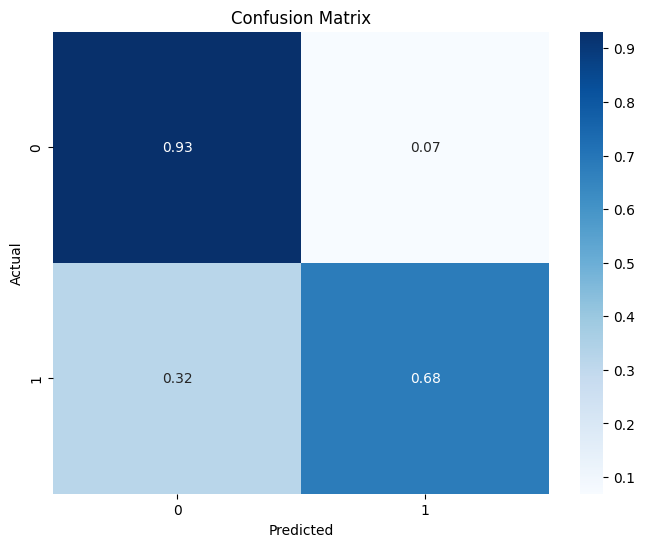

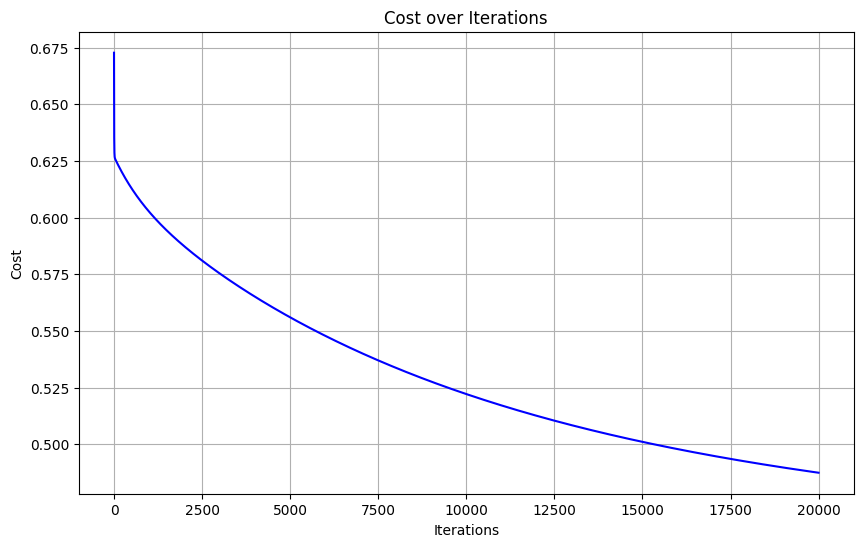

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost_logistic(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)
    cost /= m
    return cost

def compute_gradient_logistic(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i, j]
        dj_db += err_i
    dj_dw /= m
    dj_db /= m
    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        if i < 100000:
            J_history.append(compute_cost_logistic(X, y, w, b))
        if i % (num_iters // 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:.4f}")
        
    return w, b, J_history

# Load and preprocess the Titanic dataset
file_path = r'.\Titanic-Dataset.csv'
titanic = pd.read_csv(file_path)

# Drop rows with missing target values
titanic = titanic.dropna(subset=['Survived'])

# Select relevant features and drop rows with missing values
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = titanic[features + ['Survived']].dropna()

# Convert categorical features to numerical values
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)

# Separate features (X) and target (y)
X = titanic.drop('Survived', axis=1).values
y = titanic['Survived'].values

# Initialize parameters
w_init = np.zeros(X.shape[1])
b_init = 0.0

# Define learning rate and number of iterations
alpha = 0.001
num_iters = 20000

# Perform gradient descent to learn the parameters
w_learned, b_learned, J_history = gradient_descent(X, y, w_init, b_init, alpha, num_iters)

# Function to make predictions
def predict(X, w, b):
    m = X.shape[0]
    y_pred = np.zeros(m)
    for i in range(m):
        z_wb = np.dot(X[i], w) + b
        y_pred[i] = sigmoid(z_wb)
    return y_pred > 0.5  # Return 1 if sigmoid output is greater than 0.5

# Split the dataset into training and test sets manually (no sklearn)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Make predictions on the test set
y_pred = predict(X_test, w_learned, b_learned)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = np.array([[np.sum((y_test == 0) & (y_pred == 0)), np.sum((y_test == 0) & (y_pred == 1))],
                        [np.sum((y_test == 1) & (y_pred == 0)), np.sum((y_test == 1) & (y_pred == 1))]])

# Extracting values from the confusion matrix
tn, fp = conf_matrix[0]
fn, tp = conf_matrix[1]

# Calculate accuracy manually
accuracy_manual = (tp + tn) / (tp + tn + fp + fn)
print(f'Calculated Accuracy: {accuracy_manual * 100:.2f}%')

# Plotting Confusion Matrix
conf_matrix_normalized = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f", cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

# Plotting the cost over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(len(J_history)), J_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.grid(True)
plt.show()
